# 📚 Module 3 : Corpus Homogène vs Hétérogène

Dans ce notebook, nous allons explorer la différence entre un **corpus homogène** et un **corpus hétérogène**, et comprendre pourquoi cette distinction est cruciale pour choisir entre BoW et TF-IDF.

## 🎯 Objectifs
- Comprendre la notion de corpus homogène/hétérogène
- Visualiser les différences avec des exemples concrets
- Apprendre à identifier le type de corpus
- Choisir la bonne méthode de vectorisation

## 📦 Imports et Configuration

In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Configuration de l'affichage
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
plt.style.use('seaborn-v0_8-darkgrid')

print("✅ Imports réussis !")

✅ Imports réussis !


## 🧠 Définitions : Corpus Homogène vs Hétérogène

### 📘 Corpus Homogène
Un **corpus homogène** contient des documents :
- Du **même domaine** (ex: tous des articles sportifs)
- Avec un **vocabulaire similaire**
- De **style uniforme** (ex: tous des tweets)
- De **longueur comparable**

### 📗 Corpus Hétérogène
Un **corpus hétérogène** contient des documents :
- De **domaines variés** (sport, cuisine, tech, politique...)
- Avec des **vocabulaires très différents**
- De **styles mixtes** (articles, tweets, rapports...)
- De **longueurs très variables**

💡 **Pourquoi c'est important ?** Dans un corpus hétérogène, les mots communs à tous les domaines ("le", "de", "est") dominent avec BoW, masquant les mots vraiment importants.

## 🔍 Exemple 1 : Corpus Homogène (Articles de Sport)

In [2]:
# Corpus homogène : Tous les documents parlent de football
corpus_homogene = [
    "Le joueur marque un but magnifique lors du match de football",
    "L'équipe remporte le match grâce à un penalty dans les dernières minutes",
    "Le gardien réalise un arrêt spectaculaire et sauve son équipe",
    "Les supporters célèbrent la victoire de leur équipe au stade",
    "L'entraîneur prépare une nouvelle stratégie pour le prochain match",
    "Le championnat de football attire des millions de spectateurs"
]

print("🏃 CORPUS HOMOGÈNE - Articles de Football")
print("=" * 50)
for i, doc in enumerate(corpus_homogene, 1):
    print(f"Doc {i}: {doc}")
print("\n💡 Observation : Tous parlent de football avec un vocabulaire similaire")

🏃 CORPUS HOMOGÈNE - Articles de Football
Doc 1: Le joueur marque un but magnifique lors du match de football
Doc 2: L'équipe remporte le match grâce à un penalty dans les dernières minutes
Doc 3: Le gardien réalise un arrêt spectaculaire et sauve son équipe
Doc 4: Les supporters célèbrent la victoire de leur équipe au stade
Doc 5: L'entraîneur prépare une nouvelle stratégie pour le prochain match
Doc 6: Le championnat de football attire des millions de spectateurs

💡 Observation : Tous parlent de football avec un vocabulaire similaire


## 🌍 Exemple 2 : Corpus Hétérogène (Domaines Variés)

In [3]:
# Corpus hétérogène : Documents de domaines très différents
corpus_heterogene = [
    "Le joueur marque un but magnifique lors du match de football",  # Sport
    "La recette du gâteau au chocolat nécessite du beurre et de la farine",  # Cuisine
    "L'algorithme de machine learning améliore les prédictions du modèle",  # Tech
    "Le président annonce une nouvelle politique économique importante",  # Politique
    "Le médecin prescrit un traitement antibiotique pour l'infection",  # Médecine
    "L'artiste expose ses nouvelles peintures dans la galerie d'art"  # Art
]

print("🌐 CORPUS HÉTÉROGÈNE - Domaines Variés")
print("=" * 50)
domaines = ["Sport", "Cuisine", "Tech", "Politique", "Médecine", "Art"]
for i, (doc, domaine) in enumerate(zip(corpus_heterogene, domaines), 1):
    print(f"Doc {i} [{domaine}]: {doc}")
print("\n💡 Observation : Chaque document traite d'un domaine complètement différent")

🌐 CORPUS HÉTÉROGÈNE - Domaines Variés
Doc 1 [Sport]: Le joueur marque un but magnifique lors du match de football
Doc 2 [Cuisine]: La recette du gâteau au chocolat nécessite du beurre et de la farine
Doc 3 [Tech]: L'algorithme de machine learning améliore les prédictions du modèle
Doc 4 [Politique]: Le président annonce une nouvelle politique économique importante
Doc 5 [Médecine]: Le médecin prescrit un traitement antibiotique pour l'infection
Doc 6 [Art]: L'artiste expose ses nouvelles peintures dans la galerie d'art

💡 Observation : Chaque document traite d'un domaine complètement différent


## 📊 Analyse du Vocabulaire

In [4]:
def analyser_vocabulaire(corpus, nom_corpus):
    """Analyse le vocabulaire d'un corpus"""
    # Tokenisation simple
    tous_mots = []
    for doc in corpus:
        mots = doc.lower().split()
        tous_mots.extend(mots)
    
    # Statistiques
    total_mots = len(tous_mots)
    mots_uniques = len(set(tous_mots))
    ratio_diversite = mots_uniques / total_mots
    
    # Mots les plus fréquents
    compteur = Counter(tous_mots)
    top_10 = compteur.most_common(10)
    
    print(f"\n📊 ANALYSE DU {nom_corpus}")
    print("=" * 50)
    print(f"📝 Total de mots : {total_mots}")
    print(f"🔤 Mots uniques : {mots_uniques}")
    print(f"📈 Ratio de diversité : {ratio_diversite:.2%}")
    print(f"\n🏆 Top 10 mots les plus fréquents :")
    for mot, freq in top_10:
        print(f"   '{mot}' : {freq} fois ({freq/total_mots*100:.1f}%)")
    
    return compteur

# Analyser les deux corpus
compteur_homo = analyser_vocabulaire(corpus_homogene, "CORPUS HOMOGÈNE")
compteur_hetero = analyser_vocabulaire(corpus_heterogene, "CORPUS HÉTÉROGÈNE")


📊 ANALYSE DU CORPUS HOMOGÈNE
📝 Total de mots : 61
🔤 Mots uniques : 47
📈 Ratio de diversité : 77.05%

🏆 Top 10 mots les plus fréquents :
   'le' : 5 fois (8.2%)
   'de' : 4 fois (6.6%)
   'un' : 3 fois (4.9%)
   'match' : 3 fois (4.9%)
   'football' : 2 fois (3.3%)
   'les' : 2 fois (3.3%)
   'équipe' : 2 fois (3.3%)
   'joueur' : 1 fois (1.6%)
   'marque' : 1 fois (1.6%)
   'but' : 1 fois (1.6%)

📊 ANALYSE DU CORPUS HÉTÉROGÈNE
📝 Total de mots : 58
🔤 Mots uniques : 48
📈 Ratio de diversité : 82.76%

🏆 Top 10 mots les plus fréquents :
   'du' : 4 fois (6.9%)
   'le' : 3 fois (5.2%)
   'de' : 3 fois (5.2%)
   'la' : 3 fois (5.2%)
   'un' : 2 fois (3.4%)
   'joueur' : 1 fois (1.7%)
   'marque' : 1 fois (1.7%)
   'but' : 1 fois (1.7%)
   'magnifique' : 1 fois (1.7%)
   'lors' : 1 fois (1.7%)


## 🔍 Visualisation de la Distribution des Mots

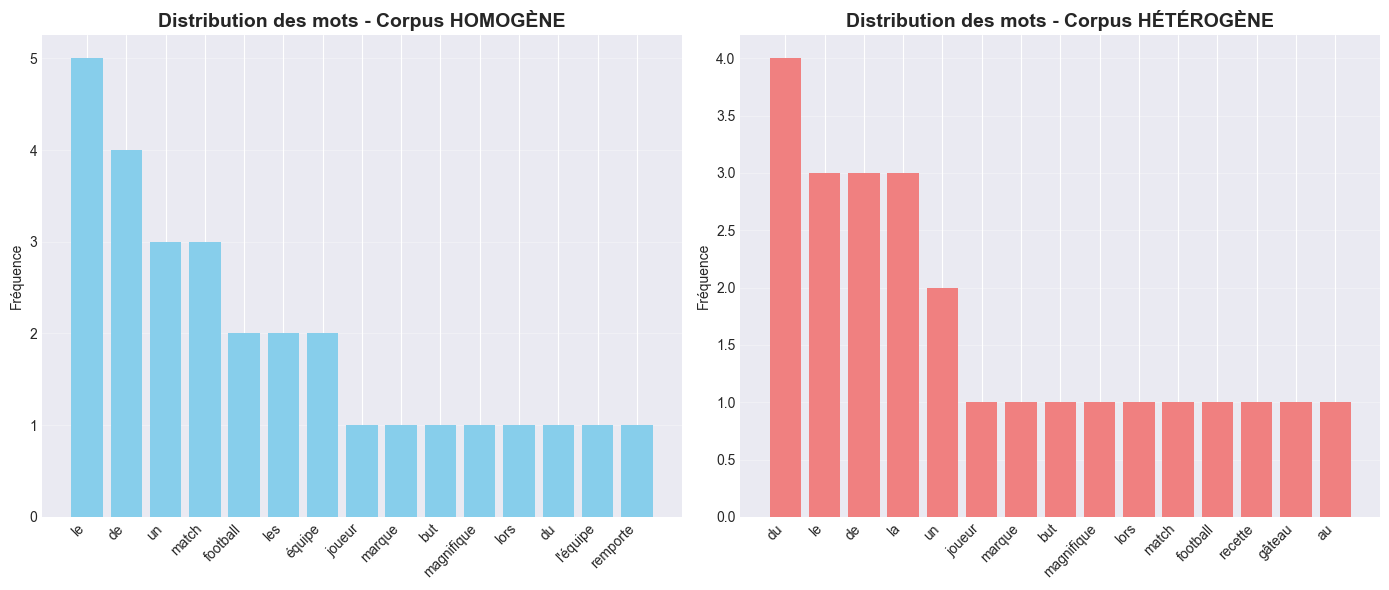


💡 Observations :
- Corpus HOMOGÈNE : Vocabulaire répétitif, mots du domaine sportif dominent
- Corpus HÉTÉROGÈNE : Vocabulaire plus dispersé, peu de répétitions


In [5]:
# Créer une visualisation de la distribution
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Corpus homogène
mots_homo, freq_homo = zip(*compteur_homo.most_common(15))
ax1.bar(range(len(mots_homo)), freq_homo, color='skyblue')
ax1.set_xticks(range(len(mots_homo)))
ax1.set_xticklabels(mots_homo, rotation=45, ha='right')
ax1.set_title('Distribution des mots - Corpus HOMOGÈNE', fontsize=14, fontweight='bold')
ax1.set_ylabel('Fréquence')
ax1.grid(axis='y', alpha=0.3)

# Corpus hétérogène
mots_hetero, freq_hetero = zip(*compteur_hetero.most_common(15))
ax2.bar(range(len(mots_hetero)), freq_hetero, color='lightcoral')
ax2.set_xticks(range(len(mots_hetero)))
ax2.set_xticklabels(mots_hetero, rotation=45, ha='right')
ax2.set_title('Distribution des mots - Corpus HÉTÉROGÈNE', fontsize=14, fontweight='bold')
ax2.set_ylabel('Fréquence')
ax2.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print("\n💡 Observations :")
print("- Corpus HOMOGÈNE : Vocabulaire répétitif, mots du domaine sportif dominent")
print("- Corpus HÉTÉROGÈNE : Vocabulaire plus dispersé, peu de répétitions")

## ⚖️ Comparaison BoW vs TF-IDF

In [6]:
def comparer_vectorisation(corpus, nom_corpus):
    """Compare BoW et TF-IDF sur un corpus"""
    print(f"\n🔬 COMPARAISON POUR {nom_corpus}")
    print("=" * 60)
    
    # Bag of Words
    bow_vectorizer = CountVectorizer()
    bow_matrix = bow_vectorizer.fit_transform(corpus)
    bow_features = bow_vectorizer.get_feature_names_out()
    
    # TF-IDF
    tfidf_vectorizer = TfidfVectorizer()
    tfidf_matrix = tfidf_vectorizer.fit_transform(corpus)
    tfidf_features = tfidf_vectorizer.get_feature_names_out()
    
    # Top mots par méthode
    print("\n📊 Top 10 mots les plus importants selon chaque méthode :")
    
    # BoW : somme des occurrences
    bow_sums = bow_matrix.sum(axis=0).A1
    bow_top_indices = bow_sums.argsort()[-10:][::-1]
    print("\n🎒 Bag of Words (par fréquence totale) :")
    for idx in bow_top_indices:
        print(f"   {bow_features[idx]:15} : {bow_sums[idx]:.0f} occurrences")
    
    # TF-IDF : moyenne des scores
    tfidf_means = tfidf_matrix.mean(axis=0).A1
    tfidf_top_indices = tfidf_means.argsort()[-10:][::-1]
    print("\n⚖️ TF-IDF (par score moyen) :")
    for idx in tfidf_top_indices:
        print(f"   {tfidf_features[idx]:15} : {tfidf_means[idx]:.3f}")
    
    return bow_matrix, tfidf_matrix

# Comparer pour les deux corpus
bow_homo, tfidf_homo = comparer_vectorisation(corpus_homogene, "CORPUS HOMOGÈNE")
bow_hetero, tfidf_hetero = comparer_vectorisation(corpus_heterogene, "CORPUS HÉTÉROGÈNE")


🔬 COMPARAISON POUR CORPUS HOMOGÈNE

📊 Top 10 mots les plus importants selon chaque méthode :

🎒 Bag of Words (par fréquence totale) :
   le              : 5 occurrences
   de              : 4 occurrences
   équipe          : 3 occurrences
   un              : 3 occurrences
   match           : 3 occurrences
   football        : 2 occurrences
   les             : 2 occurrences
   célèbrent       : 1 occurrences
   dans            : 1 occurrences
   championnat     : 1 occurrences

⚖️ TF-IDF (par score moyen) :
   de              : 0.162
   le              : 0.150
   match           : 0.121
   un              : 0.120
   équipe          : 0.119
   football        : 0.096
   les             : 0.094
   stratégie       : 0.060
   prépare         : 0.060
   prochain        : 0.060

🔬 COMPARAISON POUR CORPUS HÉTÉROGÈNE

📊 Top 10 mots les plus importants selon chaque méthode :

🎒 Bag of Words (par fréquence totale) :
   du              : 4 occurrences
   le              : 3 occurrences
   de  

## 📈 Analyse de la Similarité entre Documents

🏃 CORPUS HOMOGÈNE


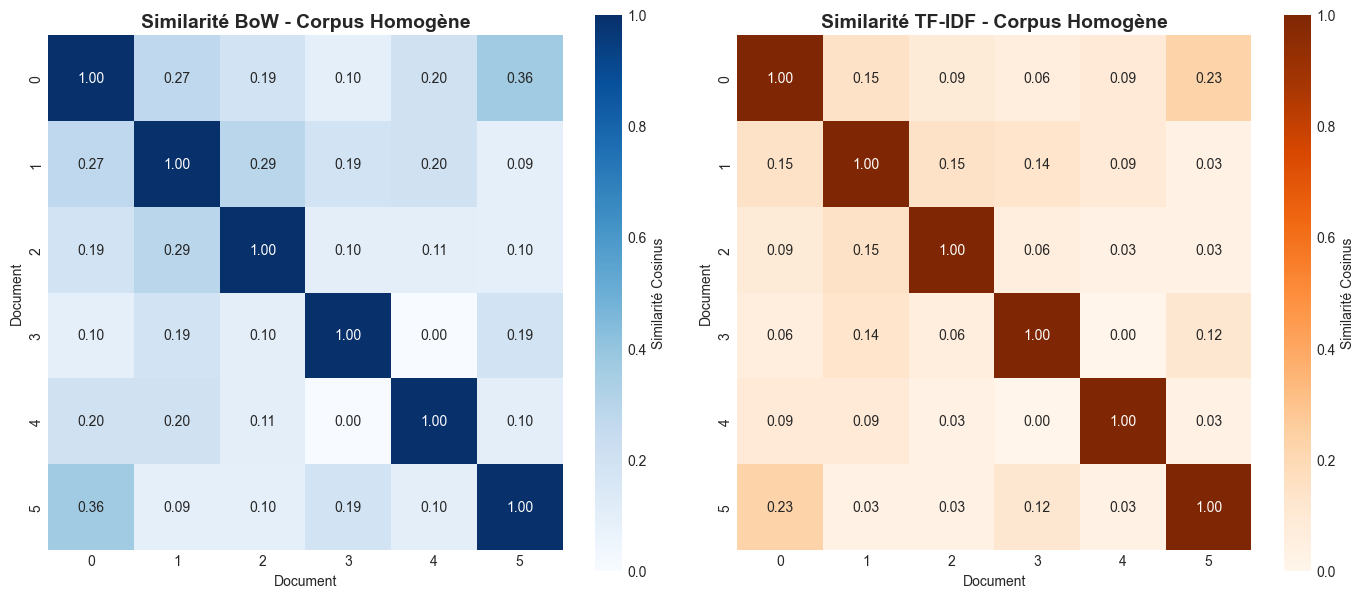


📊 Similarité moyenne entre documents (Corpus Homogène) :
   - BoW : 0.166
   - TF-IDF : 0.086

🌐 CORPUS HÉTÉROGÈNE


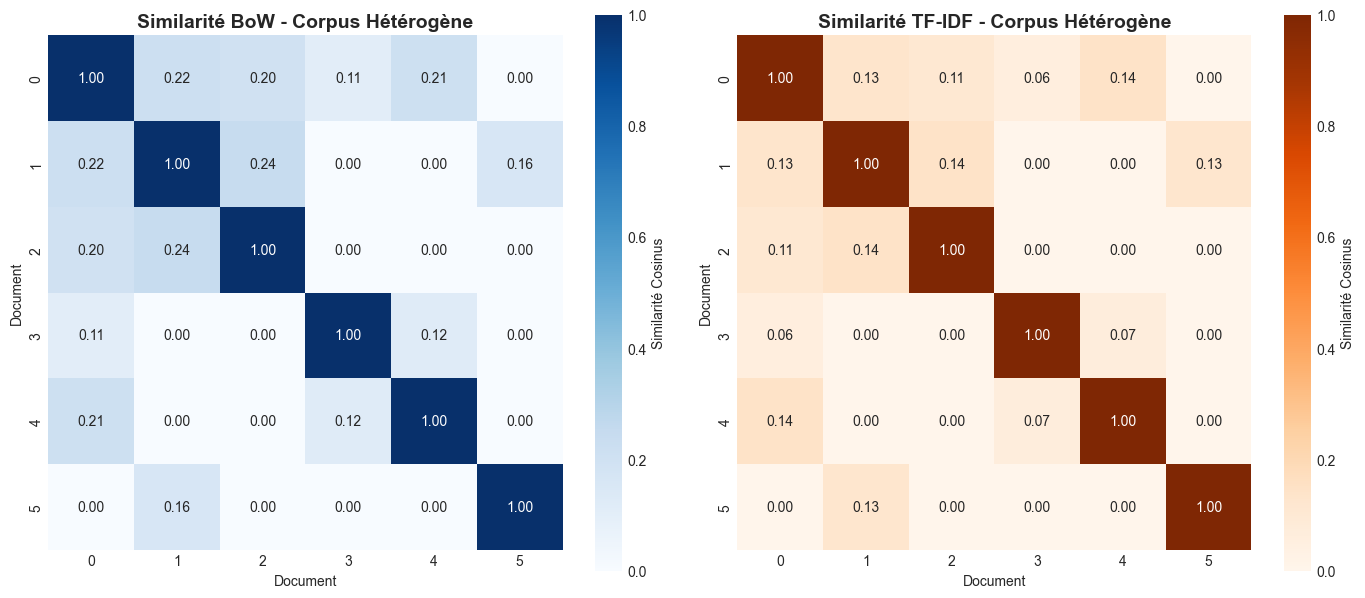


📊 Similarité moyenne entre documents (Corpus Hétérogène) :
   - BoW : 0.085
   - TF-IDF : 0.052


In [7]:
def visualiser_similarite(corpus, bow_matrix, tfidf_matrix, nom_corpus):
    """Visualise la similarité entre documents"""
    # Calculer les similarités
    sim_bow = cosine_similarity(bow_matrix)
    sim_tfidf = cosine_similarity(tfidf_matrix)
    
    # Créer les heatmaps
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
    
    # BoW
    sns.heatmap(sim_bow, annot=True, fmt='.2f', cmap='Blues', 
                square=True, cbar_kws={'label': 'Similarité Cosinus'},
                ax=ax1)
    ax1.set_title(f'Similarité BoW - {nom_corpus}', fontsize=14, fontweight='bold')
    ax1.set_xlabel('Document')
    ax1.set_ylabel('Document')
    
    # TF-IDF
    sns.heatmap(sim_tfidf, annot=True, fmt='.2f', cmap='Oranges', 
                square=True, cbar_kws={'label': 'Similarité Cosinus'},
                ax=ax2)
    ax2.set_title(f'Similarité TF-IDF - {nom_corpus}', fontsize=14, fontweight='bold')
    ax2.set_xlabel('Document')
    ax2.set_ylabel('Document')
    
    plt.tight_layout()
    plt.show()
    
    # Statistiques
    sim_bow_avg = np.mean(sim_bow[np.triu_indices_from(sim_bow, k=1)])
    sim_tfidf_avg = np.mean(sim_tfidf[np.triu_indices_from(sim_tfidf, k=1)])
    
    print(f"\n📊 Similarité moyenne entre documents ({nom_corpus}) :")
    print(f"   - BoW : {sim_bow_avg:.3f}")
    print(f"   - TF-IDF : {sim_tfidf_avg:.3f}")

# Visualiser pour les deux corpus
print("🏃 CORPUS HOMOGÈNE")
visualiser_similarite(corpus_homogene, bow_homo, tfidf_homo, "Corpus Homogène")

print("\n🌐 CORPUS HÉTÉROGÈNE")
visualiser_similarite(corpus_heterogene, bow_hetero, tfidf_hetero, "Corpus Hétérogène")

## 🎯 Impact sur la Recherche d'Information

In [8]:
def rechercher_documents(query, corpus, vectorizer, matrix, methode):
    """Recherche les documents les plus similaires à une requête"""
    # Vectoriser la requête
    query_vec = vectorizer.transform([query])
    
    # Calculer les similarités
    similarities = cosine_similarity(query_vec, matrix).flatten()
    
    # Trier par similarité décroissante
    indices_tries = similarities.argsort()[::-1]
    
    print(f"\n🔍 Recherche avec {methode} - Requête : '{query}'")
    print("=" * 60)
    for i, idx in enumerate(indices_tries):
        if similarities[idx] > 0:
            print(f"{i+1}. Score: {similarities[idx]:.3f} | Doc: {corpus[idx]}")

# Test de recherche sur corpus hétérogène
query = "algorithme informatique"

print("\n🌐 RECHERCHE DANS LE CORPUS HÉTÉROGÈNE")
print("=" * 70)

# BoW
bow_vec = CountVectorizer()
bow_mat = bow_vec.fit_transform(corpus_heterogene)
rechercher_documents(query, corpus_heterogene, bow_vec, bow_mat, "Bag of Words")

# TF-IDF
tfidf_vec = TfidfVectorizer()
tfidf_mat = tfidf_vec.fit_transform(corpus_heterogene)
rechercher_documents(query, corpus_heterogene, tfidf_vec, tfidf_mat, "TF-IDF")

print("\n💡 Observation : TF-IDF trouve mieux le document pertinent (Tech) !")


🌐 RECHERCHE DANS LE CORPUS HÉTÉROGÈNE

🔍 Recherche avec Bag of Words - Requête : 'algorithme informatique'
1. Score: 0.333 | Doc: L'algorithme de machine learning améliore les prédictions du modèle

🔍 Recherche avec TF-IDF - Requête : 'algorithme informatique'
1. Score: 0.354 | Doc: L'algorithme de machine learning améliore les prédictions du modèle

💡 Observation : TF-IDF trouve mieux le document pertinent (Tech) !


## 📋 Guide de Décision : Comment Identifier votre Type de Corpus ?

In [9]:
def evaluer_homogeneite(corpus):
    """Évalue l'homogénéité d'un corpus"""
    # Vectorisation TF-IDF
    vectorizer = TfidfVectorizer()
    matrix = vectorizer.fit_transform(corpus)
    
    # Similarité moyenne
    sim_matrix = cosine_similarity(matrix)
    sim_avg = np.mean(sim_matrix[np.triu_indices_from(sim_matrix, k=1)])
    
    # Diversité du vocabulaire
    tous_mots = ' '.join(corpus).lower().split()
    ratio_diversite = len(set(tous_mots)) / len(tous_mots)
    
    # Score d'homogénéité (0 à 1)
    score_homogeneite = (sim_avg + (1 - ratio_diversite)) / 2
    
    return {
        'similarite_moyenne': sim_avg,
        'ratio_diversite': ratio_diversite,
        'score_homogeneite': score_homogeneite
    }

# Évaluer nos corpus
print("📊 ÉVALUATION AUTOMATIQUE DE L'HOMOGÉNÉITÉ")
print("=" * 50)

for corpus, nom in [(corpus_homogene, "Homogène"), (corpus_heterogene, "Hétérogène")]:
    scores = evaluer_homogeneite(corpus)
    print(f"\n📌 Corpus {nom} :")
    print(f"   - Similarité moyenne : {scores['similarite_moyenne']:.3f}")
    print(f"   - Ratio de diversité : {scores['ratio_diversite']:.3f}")
    print(f"   - Score d'homogénéité : {scores['score_homogeneite']:.3f}")
    
    if scores['score_homogeneite'] > 0.5:
        print(f"   ➡️ Recommandation : BoW peut suffire")
    else:
        print(f"   ➡️ Recommandation : Utilisez TF-IDF")

📊 ÉVALUATION AUTOMATIQUE DE L'HOMOGÉNÉITÉ

📌 Corpus Homogène :
   - Similarité moyenne : 0.086
   - Ratio de diversité : 0.770
   - Score d'homogénéité : 0.158
   ➡️ Recommandation : Utilisez TF-IDF

📌 Corpus Hétérogène :
   - Similarité moyenne : 0.052
   - Ratio de diversité : 0.828
   - Score d'homogénéité : 0.112
   ➡️ Recommandation : Utilisez TF-IDF


## 🎓 Résumé et Recommandations

### 📌 Points Clés

1. **Corpus Homogène** :
   - Même domaine, vocabulaire similaire
   - BoW peut donner de bons résultats
   - Les mots fréquents sont souvent pertinents

2. **Corpus Hétérogène** :
   - Domaines variés, vocabulaires différents
   - TF-IDF est fortement recommandé
   - Nécessite de pondérer l'importance des mots

### 🎯 Guide de Décision

| Critère | Corpus Homogène | Corpus Hétérogène |
|---------|-----------------|--------------------|
| **Domaines** | Un seul | Multiples |
| **Vocabulaire** | Répétitif | Varié |
| **Similarité moyenne** | > 0.5 | < 0.3 |
| **Méthode recommandée** | BoW acceptable | TF-IDF nécessaire |
| **Exemple** | Tweets d'un événement | Archive de presse généraliste |

### 💡 Conseil Pratique

**Dans le doute, utilisez TF-IDF !** Il fonctionne bien dans les deux cas, tandis que BoW peut être catastrophique sur un corpus hétérogène.

## 🚀 Exercice Pratique

Testez avec vos propres corpus !

In [10]:
# 🎮 Zone d'expérimentation - Créez votre propre corpus !

# Exemple : Créez un corpus homogène (ex: recettes de cuisine)
mon_corpus_homogene = [
    "Ajoutez vos propres documents ici",
    "Tous sur le même thème",
    "Pour tester l'homogénéité"
]

# Exemple : Créez un corpus hétérogène (ex: différents sujets)
mon_corpus_heterogene = [
    "Un document sur un sujet",
    "Un autre sur un sujet complètement différent",
    "Et ainsi de suite..."
]

# Décommentez les lignes ci-dessous après avoir créé vos corpus
# scores_homo = evaluer_homogeneite(mon_corpus_homogene)
# scores_hetero = evaluer_homogeneite(mon_corpus_heterogene)
# print(f"Votre corpus homogène : {scores_homo}")
# print(f"Votre corpus hétérogène : {scores_hetero}")

print("✏️ Remplacez les exemples ci-dessus par vos propres documents !")

✏️ Remplacez les exemples ci-dessus par vos propres documents !


---

## 🎓 Conclusion

Vous savez maintenant :
- ✅ Distinguer un corpus homogène d'un corpus hétérogène
- ✅ Analyser automatiquement l'homogénéité d'un corpus
- ✅ Choisir entre BoW et TF-IDF selon votre corpus
- ✅ Comprendre l'impact sur les performances

**Rappel** : TF-IDF est presque toujours un meilleur choix, surtout pour :
- La recherche d'information
- La classification de textes variés
- L'analyse de grandes collections hétérogènes

---
*Module 3 - Formation NLP - Corpus Homogène vs Hétérogène*